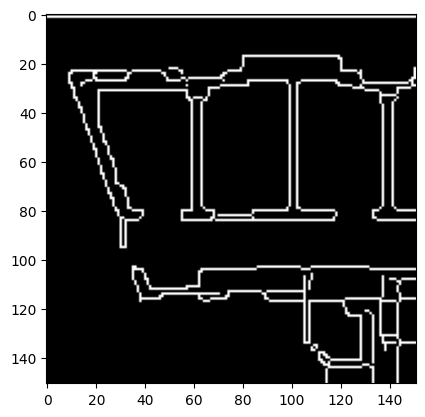

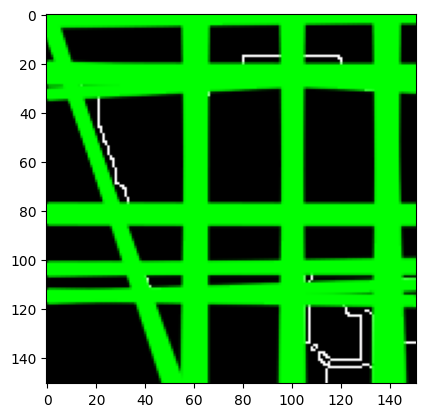

In [1]:
import cv2 as cv
import numpy as np
import math
import matplotlib.pyplot as plt

filename = 'img/E2_2_tile.png'

# Loads an image
src = cv.imread(cv.samples.findFile(filename), cv.IMREAD_GRAYSCALE)
if src is None:
    print('Error opening image!')
    print('Usage: hough_lines.py [image_name -- default ' + filename + '] \n')
    exit()

# Resize the image to make it square
max_dim = max(src.shape[:2])
src_square = cv.resize(src, (max_dim, max_dim), interpolation=cv.INTER_LINEAR)

# Apply morphological opening
kernel = np.ones((5,5),np.uint8)
src_square = cv.morphologyEx(src_square, cv.MORPH_OPEN, kernel, iterations=3)

# Edge detection
dst = cv.Canny(src_square, 50, 200, None, 3)

# Convert to BGR image for display
cdst = cv.cvtColor(dst, cv.COLOR_GRAY2BGR)

# Detect lines
lines = cv.HoughLines(dst, 1, np.pi / 180, max_dim//3, None, 0, 0)

plt.imshow(cdst)
plt.show()

# Draw lines
if lines is not None:
    for i in range(0, len(lines)):
        rho = lines[i][0][0]
        theta = lines[i][0][1]
        a = math.cos(theta)
        b = math.sin(theta)
        x0 = a * rho
        y0 = b * rho
        max_len = int(np.sqrt(2) * max_dim) # Diagonal of the square image
        pt1 = (int(x0 + max_len*(-b)), int(y0 + max_len*(a)))
        pt2 = (int(x0 - max_len*(-b)), int(y0 - max_len*(a)))
        
        # Check if the line is very diagonal or straight
        cv.line(cdst, pt1, pt2, (0,255,0), 3, cv.LINE_AA)
        

# Display the result
plt.imshow(cdst)
plt.show()

Tiling with diagonals

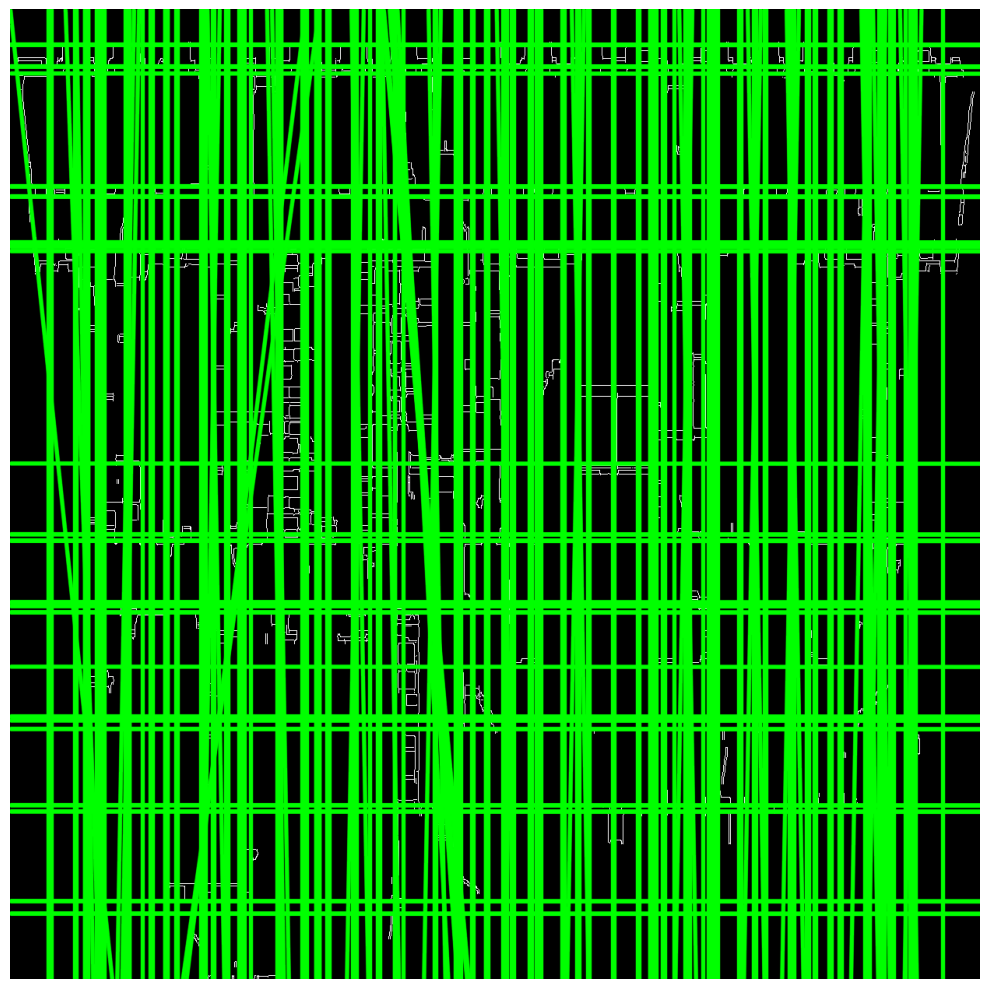

In [2]:
import cv2 as cv
import numpy as np
import math
import matplotlib.pyplot as plt

filename = 'img/reassembled_E2_2.png'

# Loads an image
src = cv.imread(filename, cv.IMREAD_GRAYSCALE)
if src is None:
    print('Error opening image!')
    print('Usage: hough_lines.py [image_name] \n')
    exit()

# Resize the image to make it square
max_dim = max(src.shape[:2])
src_square = cv.resize(src, (max_dim, max_dim), interpolation=cv.INTER_LINEAR)

# Apply morphological opening
kernel = np.ones((5,5),np.uint8)
src_square = cv.morphologyEx(src_square, cv.MORPH_OPEN, kernel, iterations=3)

# Edge detection
dst = cv.Canny(src_square, 50, 200, None, 3)

# Convert to BGR image for display
cdst = cv.cvtColor(dst, cv.COLOR_GRAY2BGR)

# Tile size
tile_size = max_dim // 4

# Detect lines in each tile
all_lines = []
for i in range(0, max_dim, tile_size):
    for j in range(0, max_dim, tile_size):
        tile = dst[i:i+tile_size, j:j+tile_size]
        lines = cv.HoughLines(tile, 1, np.pi / 180, tile_size//3, None, 0, 0)
        if lines is not None:
            for line in lines:
                rho, theta = line[0]
                a = math.cos(theta)
                b = math.sin(theta)
                x0 = a * rho + j  # Adjust x-coordinate based on tile position
                y0 = b * rho + i  # Adjust y-coordinate based on tile position
                max_len = int(np.sqrt(2) * max_dim)
                pt1 = (int(x0 + max_len*(-b)), int(y0 + max_len*(a)))
                pt2 = (int(x0 - max_len*(-b)), int(y0 - max_len*(a)))
                
                # Check if the line is horizontal or vertical
                angle_deg = theta * 180 / np.pi
                if (-10 <= angle_deg <= 10) or (80 <= angle_deg <= 100) or (170 <= angle_deg <= 190) or (260 <= angle_deg <= 280) or (350 <= angle_deg <= 360):
                    cv.line(cdst, pt1, pt2, (0,255,0), 3, cv.LINE_AA)

# Display the result
plt.figure(figsize=(10, 10))
plt.imshow(cdst)
plt.axis('off')
plt.tight_layout()
plt.show()

Tiling Without Diagonals

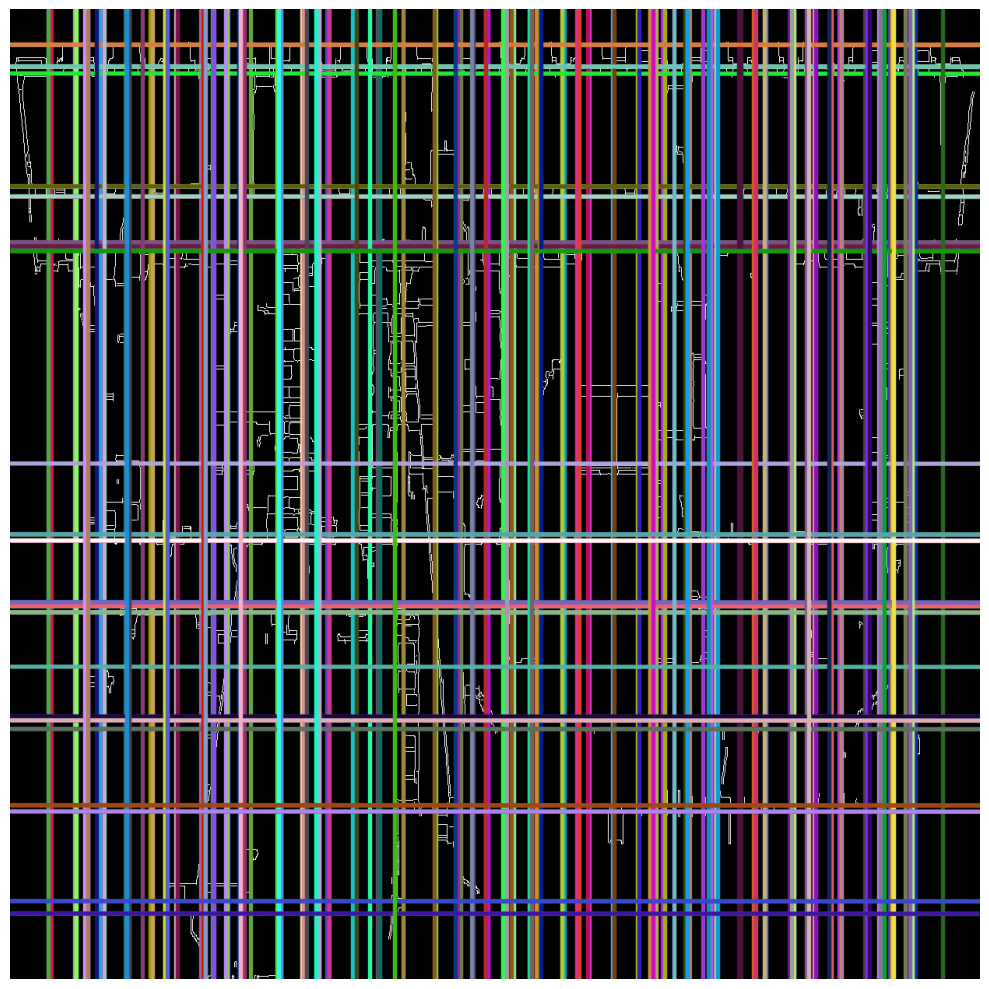

In [3]:
import cv2 as cv
import numpy as np
import math
import random
import matplotlib.pyplot as plt

# ------------
# ------------

filename = 'img/reassembled_E2_2.png'
src = cv.imread(filename, cv.IMREAD_GRAYSCALE)
if src is None:
   print('Error opening image!')
   print('Usage: hough_lines.py [image_name] \n')
   exit()

# Resize the image to make it square
max_dim = max(src.shape[:2])
src_square = cv.resize(src, (max_dim, max_dim), interpolation=cv.INTER_LINEAR)

# Apply morphological opening
kernel = np.ones((5,5),np.uint8)
src_square = cv.morphologyEx(src_square, cv.MORPH_OPEN, kernel, iterations=3)

# Edge detection
dst = cv.Canny(src_square, 50, 200, None, 3)

# Convert to BGR image for display
cdst = cv.cvtColor(dst, cv.COLOR_GRAY2BGR)

# Tile size
tile_size = max_dim // 4

# Detect lines in each tile
all_lines = []
for i in range(0, max_dim, tile_size):
   for j in range(0, max_dim, tile_size):
       tile = dst[i:i+tile_size, j:j+tile_size]
       lines = cv.HoughLines(tile, 1, np.pi / 180, tile_size//3, None, 0, 0)
       if lines is not None:
           for line in lines:
               rho, theta = line[0]
               a = math.cos(theta)
               b = math.sin(theta)
               x0 = a * rho + j  # Adjust x-coordinate based on tile position
               y0 = b * rho + i  # Adjust y-coordinate based on tile position
               max_len = int(np.sqrt(2) * max_dim)
               pt1 = (int(x0 + max_len*(-b)), int(y0 + max_len*(a)))
               pt2 = (int(x0 - max_len*(-b)), int(y0 - max_len*(a)))

               # Check if the line is horizontal or vertical
               angle_deg = theta * 180 / np.pi
               tolerance = 0.1  # Adjust tolerance as needed
               if (abs(angle_deg) <= tolerance) or (abs(abs(angle_deg) - 90) <= tolerance) or (abs(abs(angle_deg) - 180) <= tolerance) or (abs(abs(angle_deg) - 270) <= tolerance):
                color = (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))
                cv.line(cdst, pt1, pt2, color, 3, cv.LINE_AA)

# Display the result
plt.figure(figsize=(10, 10))
plt.imshow(cdst)
plt.axis('off')
plt.tight_layout()
plt.show()

No tiling without non-maximum suppression, no diagonals (rho = 0.1)

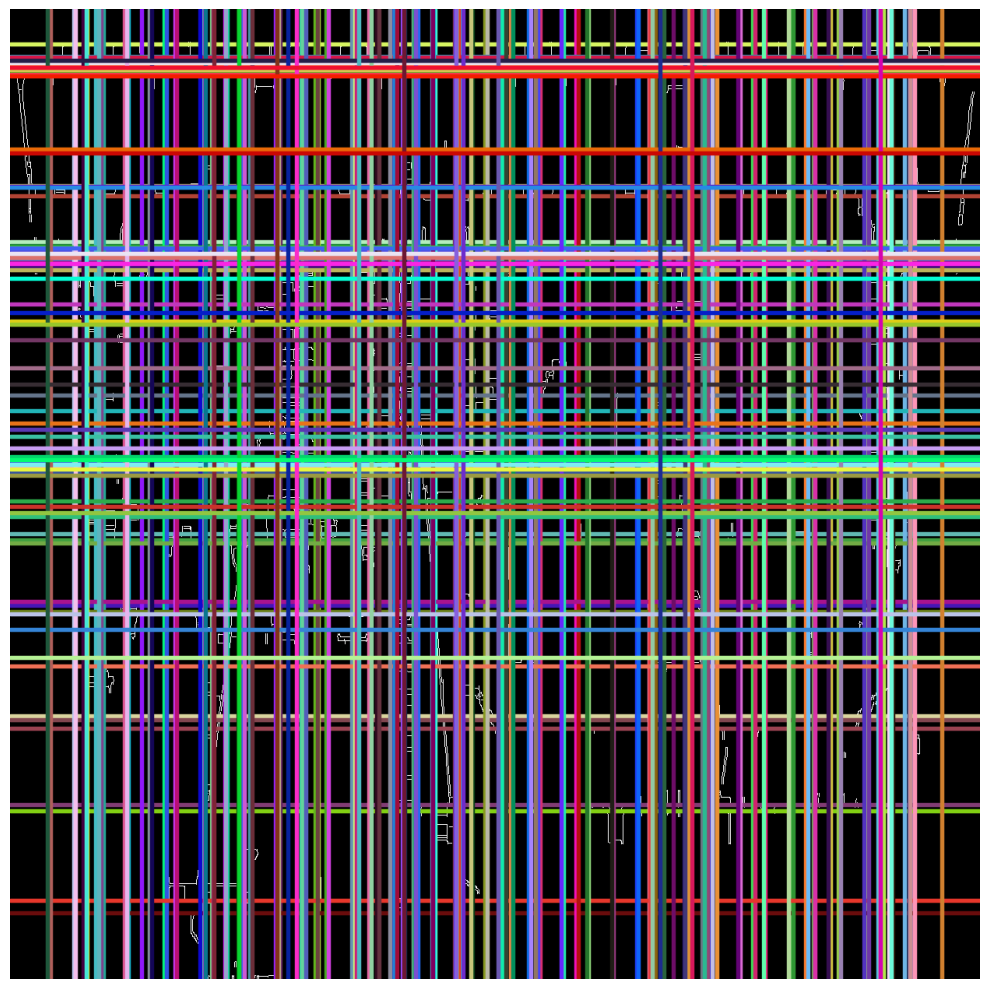

In [25]:
import cv2 as cv
import numpy as np
import math
import random
import matplotlib.pyplot as plt

# ------------
# ------------
filename = 'img/reassembled_E2_2.png'
src = cv.imread(filename, cv.IMREAD_GRAYSCALE)
if src is None:
    print('Error opening image!')
    print('Usage: hough_lines.py [image_name] \n')
    exit()

# Resize the image to make it square
max_dim = max(src.shape[:2])
src_square = cv.resize(src, (max_dim, max_dim), interpolation=cv.INTER_LINEAR)

# Apply morphological opening
kernel = np.ones((5,5),np.uint8)
src_square = cv.morphologyEx(src_square, cv.MORPH_OPEN, kernel, iterations=3)

# Edge detection
dst = cv.Canny(src_square, 50, 200, None, 3)

# Convert to BGR image for display
cdst = cv.cvtColor(dst, cv.COLOR_GRAY2BGR)

# Detect lines
lines = cv.HoughLines(dst, 0.1, np.pi / 180, max_dim//12, None, 0, 0)
if lines is not None:
    for line in lines:
        rho, theta = line[0]
        a = math.cos(theta)
        b = math.sin(theta)
        x0 = a * rho
        y0 = b * rho
        max_len = int(np.sqrt(2) * max_dim)
        pt1 = (int(x0 + max_len*(-b)), int(y0 + max_len*(a)))
        pt2 = (int(x0 - max_len*(-b)), int(y0 - max_len*(a)))

        # Check if the line is horizontal or vertical
        angle_deg = theta * 180 / np.pi
        tolerance = 0.1 # Adjust tolerance as needed
        if (abs(angle_deg) <= tolerance) or (abs(abs(angle_deg) - 90) <= tolerance) or (abs(abs(angle_deg) - 180) <= tolerance) or (abs(abs(angle_deg) - 270) <= tolerance):
            color = (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))
            cv.line(cdst, pt1, pt2, color, 3, cv.LINE_AA)

# Display the result
plt.figure(figsize=(10, 10))
plt.imshow(cdst)
plt.axis('off')
plt.tight_layout()
plt.show()

No diagonals with non-maximum suppression attempt 2, no tiling ( use this one )

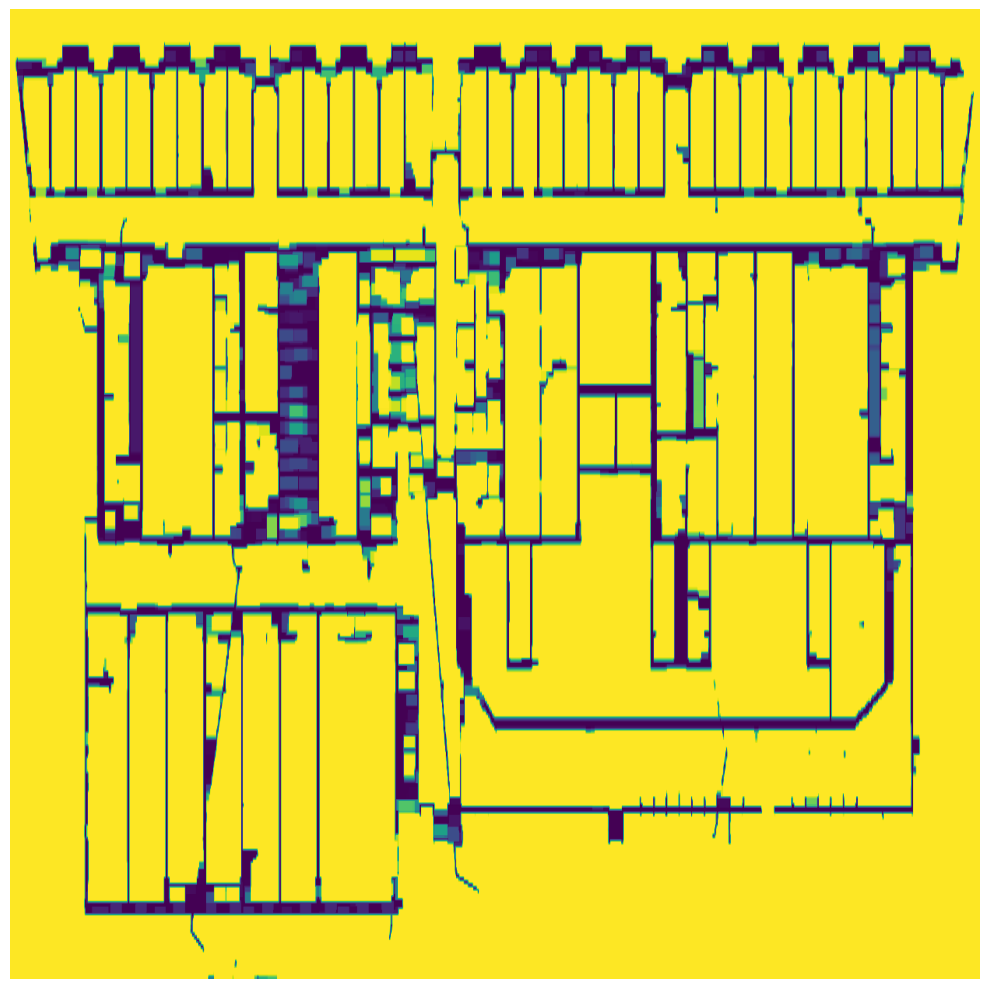

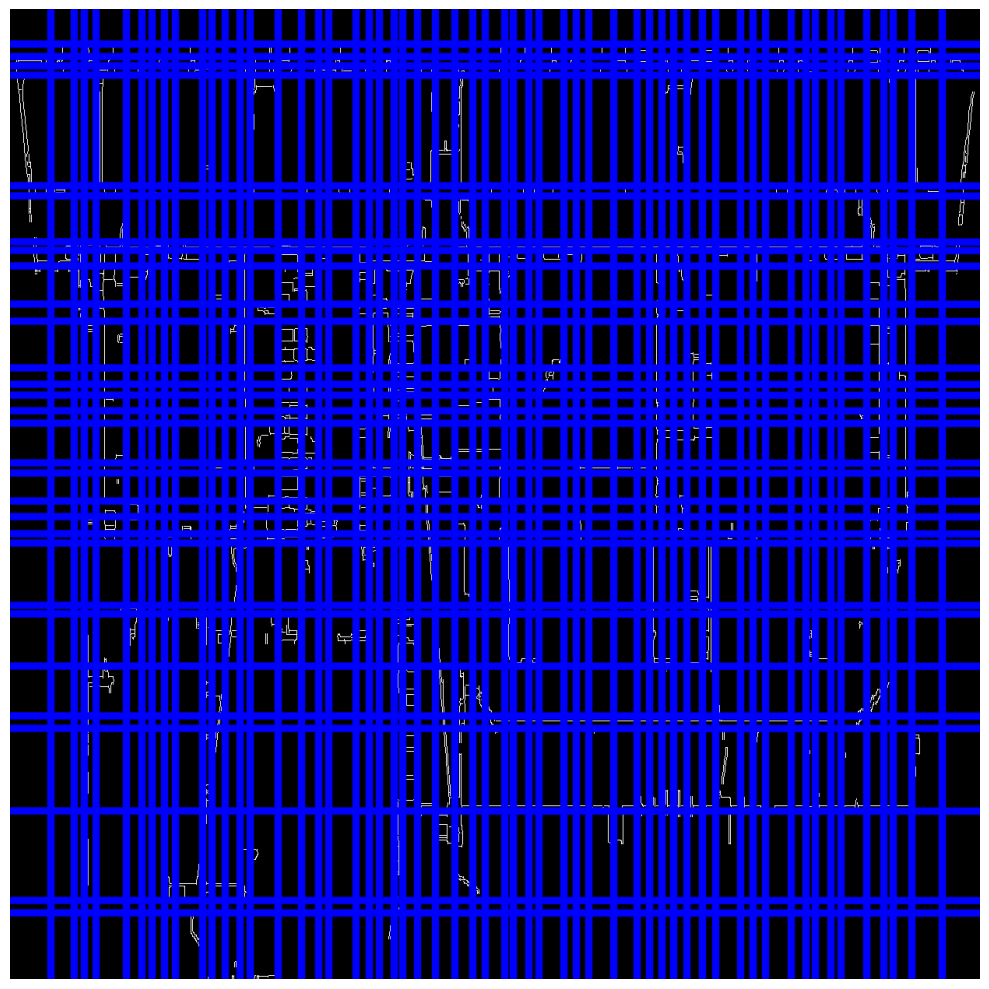

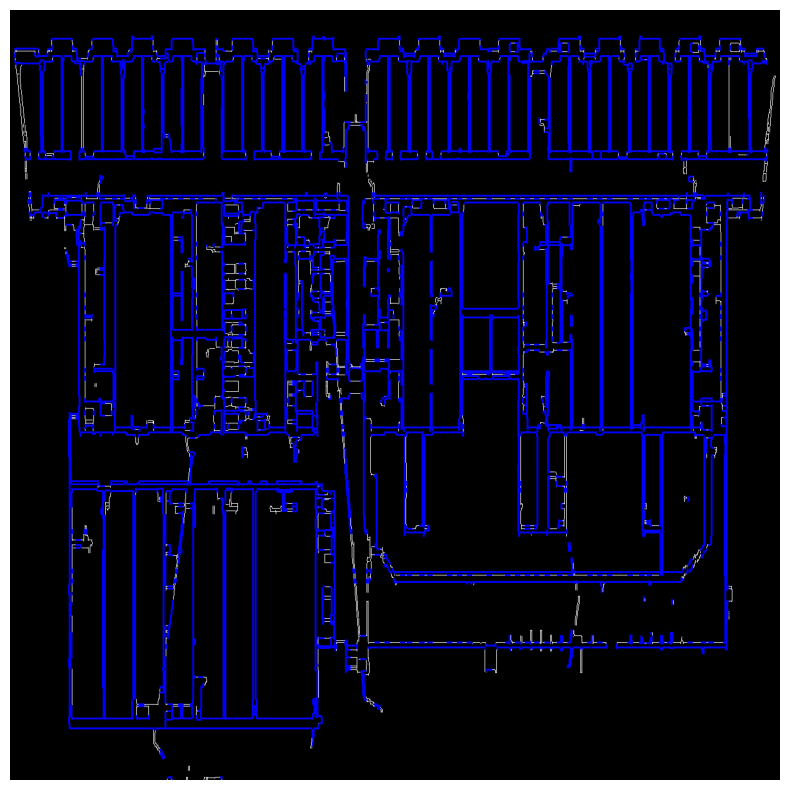

(315, 1246)


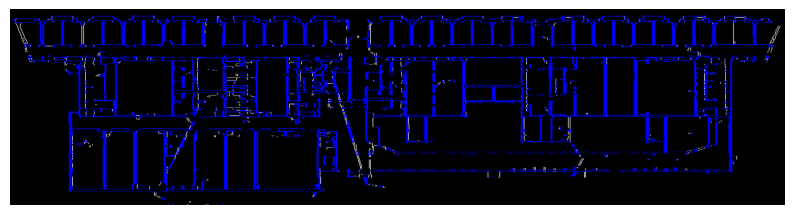

In [26]:
import cv2 as cv
import numpy as np
import math
import matplotlib.pyplot as plt
import random

# ------------
# ------------
filename = 'img/reassembled_E2_2.png'
src = cv.imread(filename, cv.IMREAD_GRAYSCALE)
if src is None:
    print('Error opening image!')
    print('Usage: hough_lines.py [image_name] \n')
    exit()

# Resize the image to make it square
max_dim = max(src.shape[:2])
src_square = cv.resize(src, (max_dim, max_dim), interpolation=cv.INTER_LINEAR)

# Apply morphological opening
kernel = np.ones((5,5),np.uint8)
src_square = cv.morphologyEx(src_square, cv.MORPH_OPEN, kernel, iterations=3)

# Display the result
plt.figure(figsize=(10, 10))
plt.imshow(src_square)
plt.axis('off')
plt.tight_layout()
plt.show()

# Edge detection
dst = cv.Canny(src_square, 50, 200, None, 3)

# Convert to BGR image for display
cdst = cv.cvtColor(dst, cv.COLOR_GRAY2BGR)

# Detect lines in the entire image
lines = cv.HoughLines(dst, 0.1, np.pi / 180, max_dim//10, None, 0, 0)
all_lines = []
if lines is not None:
    for line in lines:
        rho, theta = line[0]
        a = math.cos(theta)
        b = math.sin(theta)
        x0 = a * rho
        y0 = b * rho
        max_len = int(np.sqrt(2) * max_dim)
        pt1 = (int(x0 + max_len*(-b)), int(y0 + max_len*(a)))
        pt2 = (int(x0 - max_len*(-b)), int(y0 - max_len*(a)))
        all_lines.append((pt1, pt2, theta))

# Non-maximum suppression
strong_lines = np.zeros([len(all_lines),1,2])
n2 = 0
for n1 in range(0, len(all_lines)):
    pt1, pt2, theta = all_lines[n1]
    rho = abs((pt2[1] - pt1[1]) * pt1[0] - (pt2[0] - pt1[0]) * pt1[1]) / np.sqrt((pt2[1] - pt1[1])**2 + (pt2[0] - pt1[0])**2)
    if n1 == 0:
        strong_lines[n2] = [[rho, theta]]
        n2 = n2 + 1
    else:
        if rho < 0:
            rho *= -1
            theta -= np.pi
        closeness_rho = np.isclose(rho, strong_lines[0:n2,0,0], atol=10)  # Decrease atol for rho
        closeness_theta = np.isclose(theta, strong_lines[0:n2,0,1], atol=np.pi/45)  # Decrease atol for theta
        closeness = np.all([closeness_rho, closeness_theta], axis=0)
        if not any(closeness):
            strong_lines[n2] = [[rho, theta]]
            n2 = n2 + 1

cdst_copy = cdst.copy()

# Draw lines on the image
for line in strong_lines[:n2]:
    rho, theta = line[0]
    a = math.cos(theta)
    b = math.sin(theta)
    x0 = a * rho
    y0 = b * rho
    max_len = int(np.sqrt(2) * max_dim)
    pt1 = (int(x0 + max_len*(-b)), int(y0 + max_len*(a)))
    pt2 = (int(x0 - max_len*(-b)), int(y0 - max_len*(a)))
    angle_deg = theta * 180 / np.pi
    tolerance = 0.1  # Adjust tolerance as needed
    if (abs(angle_deg) <= tolerance) or (abs(abs(angle_deg) - 90) <= tolerance) or (abs(abs(angle_deg) - 180) <= tolerance) or (abs(abs(angle_deg) - 270) <= tolerance):
        # color = (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))
        color  = (0, 0, 255)
        cv.line(cdst, pt1, pt2, color, 7, cv.LINE_AA)

# Display the result
plt.figure(figsize=(10, 10))
plt.imshow(cdst)
plt.axis('off')
plt.tight_layout()
plt.show()

# Accumulate all points from each line found by Hough transform
all_hough_points = []


# Create a blank white image
blank_image = np.full((max_dim, max_dim, 3), (255, 255, 255), dtype=np.uint8)

for y in range(cdst.shape[0]):
    for x in range(cdst.shape[1]):
        if np.array_equal(cdst[y, x], [0, 0, 255]):
            all_hough_points.append((x, y))

# for x,y in all_hough_points:
#     blank_image[y,x] = (0,0,255)

# # Show the result
# plt.figure(figsize=(10, 10))
# plt.imshow(blank_image)
# plt.axis('off')
# plt.show()

for x, y in all_hough_points:
    if y+1 in range(cdst_copy.shape[0]) and y-1 in range(cdst_copy.shape[0]) and x+1 in range(cdst_copy.shape[0]) and x-1 in range(cdst_copy.shape[0]) :
        if np.array_equal(cdst_copy[y, x], [255, 255, 255]):
            cdst_copy[y,x] = (0,0,255)
            cdst_copy[y+1,x+1] = (0,0,255)
            cdst_copy[y+1,x-1] = (0,0,255)
            cdst_copy[y-1,x-1] = (0,0,255)
            cdst_copy[y-1,x+1] = (0,0,255)

# Show the result
plt.figure(figsize=(10, 10))
plt.imshow(cdst_copy)
plt.axis('off')
plt.show()

print(src.shape)
final_image = cv.resize(cdst_copy, (src.shape[1], src.shape[0]), interpolation=cv.INTER_LINEAR)

# Show the result
plt.figure(figsize=(10, 10))
plt.imshow(final_image)
plt.axis('off')
plt.show()

Tiling without diagonals with non maximum suppression

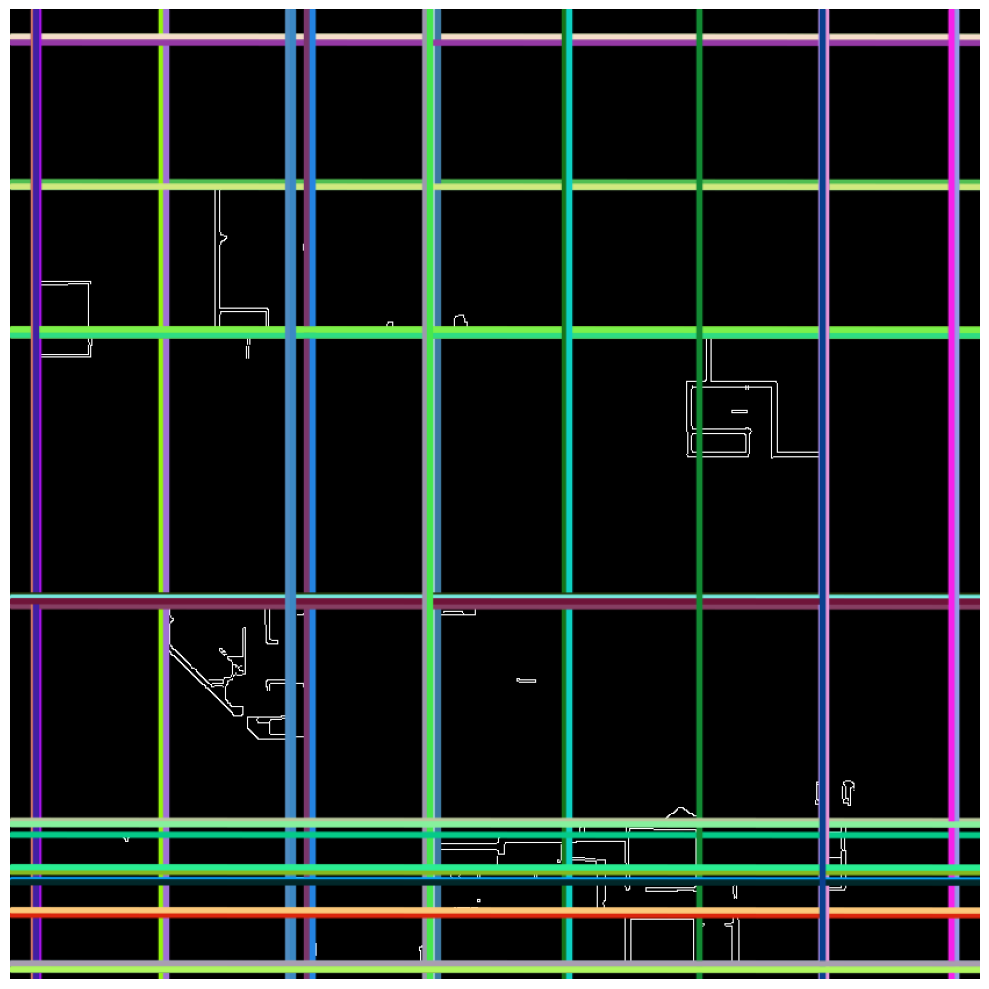

In [5]:
import cv2 as cv
import numpy as np
import math
import matplotlib.pyplot as plt
import random

# ------------
# ------------
filename = 'img/reassembled_SE2.png'
src = cv.imread(filename, cv.IMREAD_GRAYSCALE)
if src is None:
    print('Error opening image!')
    print('Usage: hough_lines.py [image_name] \n')
    exit()

# Resize the image to make it square
max_dim = max(src.shape[:2])
src_square = cv.resize(src, (max_dim, max_dim), interpolation=cv.INTER_LINEAR)

# Apply morphological opening
kernel = np.ones((5,5),np.uint8)
src_square = cv.morphologyEx(src_square, cv.MORPH_OPEN, kernel, iterations=3)

# Edge detection
dst = cv.Canny(src_square, 50, 200, None, 3)

# Convert to BGR image for display
cdst = cv.cvtColor(dst, cv.COLOR_GRAY2BGR)

# Tile size
tile_size = max_dim // 4

# Detect lines in each tile
all_lines = []
for i in range(0, max_dim, tile_size):
    for j in range(0, max_dim, tile_size):
        tile = dst[i:i+tile_size, j:j+tile_size]
        lines = cv.HoughLines(tile, 1, np.pi / 180, tile_size//3, None, 0, 0)
        if lines is not None:
            for line in lines:
                rho, theta = line[0]
                a = math.cos(theta)
                b = math.sin(theta)
                x0 = a * rho + j  # Adjust x-coordinate based on tile position
                y0 = b * rho + i  # Adjust y-coordinate based on tile position
                max_len = int(np.sqrt(2) * max_dim)
                pt1 = (int(x0 + max_len*(-b)), int(y0 + max_len*(a)))
                pt2 = (int(x0 - max_len*(-b)), int(y0 - max_len*(a)))
                all_lines.append((pt1, pt2, theta))

# Non-maximum suppression
def is_nearby(line1, line2, threshold=10):
    (x1, y1), (x2, y2), _ = line1
    (x3, y3), (x4, y4), _ = line2
    distance1 = np.sqrt((x1 - x3)**2 + (y1 - y3)**2)
    distance2 = np.sqrt((x2 - x4)**2 + (y2 - y4)**2)
    return distance1 < threshold and distance2 < threshold

def suppress_non_maximum(lines, threshold=10):
    suppressed_lines = []
    for i in range(len(lines)):
        is_maximum = True
        for j in range(len(lines)):
            if i != j and is_nearby(lines[i], lines[j], threshold):
                if abs(lines[i][2]) > abs(lines[j][2]):
                    is_maximum = False
                    break
        if is_maximum:
            suppressed_lines.append(lines[i])
    return suppressed_lines

suppressed_lines = suppress_non_maximum(all_lines)

# Draw lines on the image
for line in suppressed_lines:
    pt1, pt2, theta = line
    angle_deg = theta * 180 / np.pi
    tolerance = 0.1  # Adjust tolerance as needed
    if (abs(angle_deg) <= tolerance) or (abs(abs(angle_deg) - 90) <= tolerance) or (abs(abs(angle_deg) - 180) <= tolerance) or (abs(abs(angle_deg) - 270) <= tolerance):
        color = (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))
        cv.line(cdst, pt1, pt2, color, 3, cv.LINE_AA)

# Display the result
plt.figure(figsize=(10, 10))
plt.imshow(cdst)
plt.axis('off')
plt.tight_layout()
plt.show()

Tiling without diagonals with non maximum suppression attempt 2

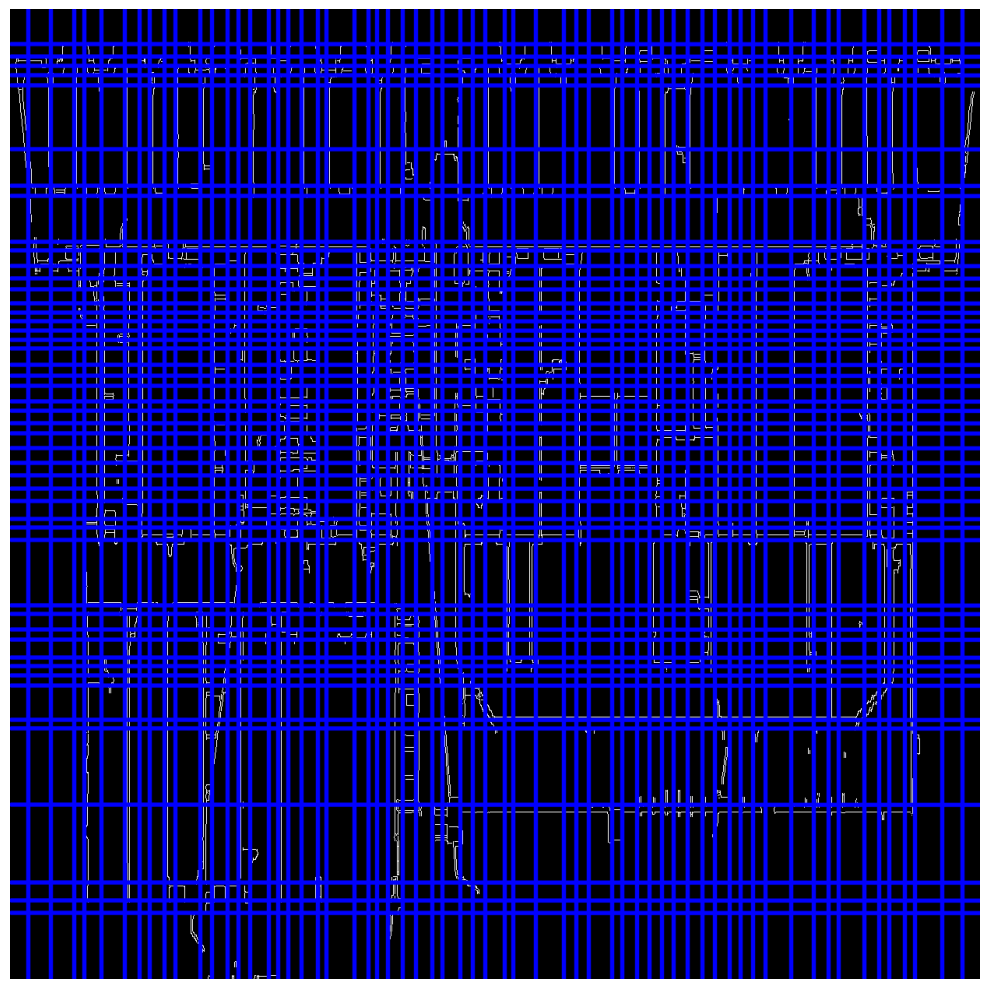

In [20]:
import cv2 as cv
import numpy as np
import math
import matplotlib.pyplot as plt
import random

# ------------
# ------------
filename = 'img/reassembled_E2_2.png'
src = cv.imread(filename, cv.IMREAD_GRAYSCALE)
if src is None:
    print('Error opening image!')
    print('Usage: hough_lines.py [image_name] \n')
    exit()

# Resize the image to make it square
max_dim = max(src.shape[:2])
src_square = cv.resize(src, (max_dim, max_dim), interpolation=cv.INTER_LINEAR)

# Apply morphological opening
kernel = np.ones((5,5),np.uint8)
src_square = cv.morphologyEx(src_square, cv.MORPH_OPEN, kernel, iterations=3)


# Edge detection
dst = cv.Canny(src_square, 50, 200, None, 3)

# Convert to BGR image for display
cdst = cv.cvtColor(dst, cv.COLOR_GRAY2BGR)

# Tile size
tile_size = max_dim // 4

# Detect lines in each tile
all_lines = []
for i in range(0, max_dim, tile_size):
    for j in range(0, max_dim, tile_size):
        tile = dst[i:i+tile_size, j:j+tile_size]
        lines = cv.HoughLines(tile, 0.1, np.pi / 180, tile_size//10, None, 0, 0)
        if lines is not None:
            for line in lines:
                rho, theta = line[0]
                a = math.cos(theta)
                b = math.sin(theta)
                x0 = a * rho + j # Adjust x-coordinate based on tile position
                y0 = b * rho + i # Adjust y-coordinate based on tile position
                max_len = int(np.sqrt(2) * max_dim)
                pt1 = (int(x0 + max_len*(-b)), int(y0 + max_len*(a)))
                pt2 = (int(x0 - max_len*(-b)), int(y0 - max_len*(a)))
                all_lines.append((pt1, pt2, theta))

# Non-maximum suppression
strong_lines = np.zeros([len(all_lines),1,2])
n2 = 0
for n1 in range(0, len(all_lines)):
    pt1, pt2, theta = all_lines[n1]
    rho = abs((pt2[1] - pt1[1]) * pt1[0] - (pt2[0] - pt1[0]) * pt1[1]) / np.sqrt((pt2[1] - pt1[1])**2 + (pt2[0] - pt1[0])**2)
    if n1 == 0:
        strong_lines[n2] = [[rho, theta]]
        n2 = n2 + 1
    else:
        if rho < 0:
            rho *= -1
            theta -= np.pi
        closeness_rho = np.isclose(rho, strong_lines[0:n2,0,0], atol=10)  # Decrease atol for rho
        closeness_theta = np.isclose(theta, strong_lines[0:n2,0,1], atol=np.pi/45)  # Decrease atol for theta
        closeness = np.all([closeness_rho, closeness_theta], axis=0)
        if not any(closeness):
            strong_lines[n2] = [[rho, theta]]
            n2 = n2 + 1

# Draw lines on the image
for line in strong_lines[:n2]:
    rho, theta = line[0]
    a = math.cos(theta)
    b = math.sin(theta)
    x0 = a * rho
    y0 = b * rho
    max_len = int(np.sqrt(2) * max_dim)
    pt1 = (int(x0 + max_len*(-b)), int(y0 + max_len*(a)))
    pt2 = (int(x0 - max_len*(-b)), int(y0 - max_len*(a)))
    angle_deg = theta * 180 / np.pi
    tolerance = 0.1 # Adjust tolerance as needed
    if (abs(angle_deg) <= tolerance) or (abs(abs(angle_deg) - 90) <= tolerance) or (abs(abs(angle_deg) - 180) <= tolerance) or (abs(abs(angle_deg) - 270) <= tolerance):
        # color = (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))
        color = (0,0,255)
        cv.line(cdst, pt1, pt2, color, 3, cv.LINE_AA)

# Display the result
plt.figure(figsize=(10, 10))
plt.imshow(cdst)
plt.axis('off')
plt.tight_layout()
plt.show()

Tiling without diagonals with non maximum suppression attempt 2 with improved visualization

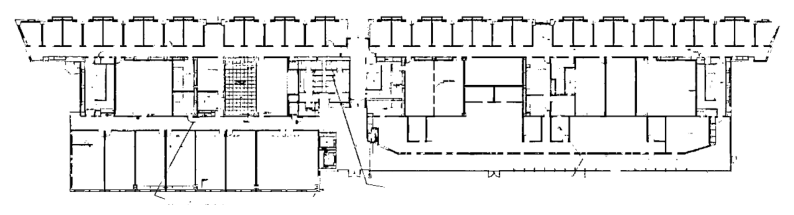

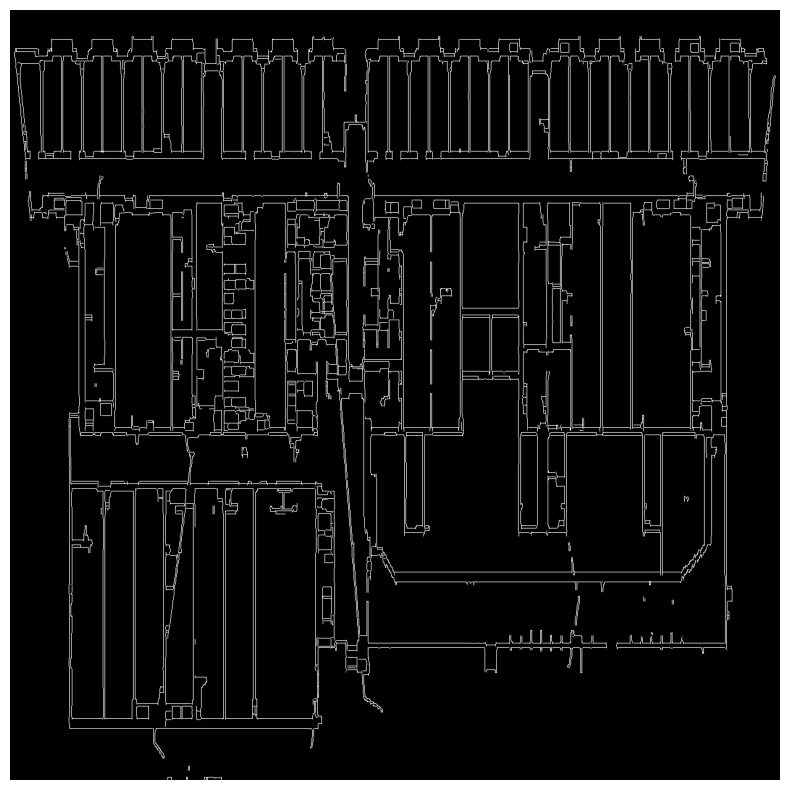

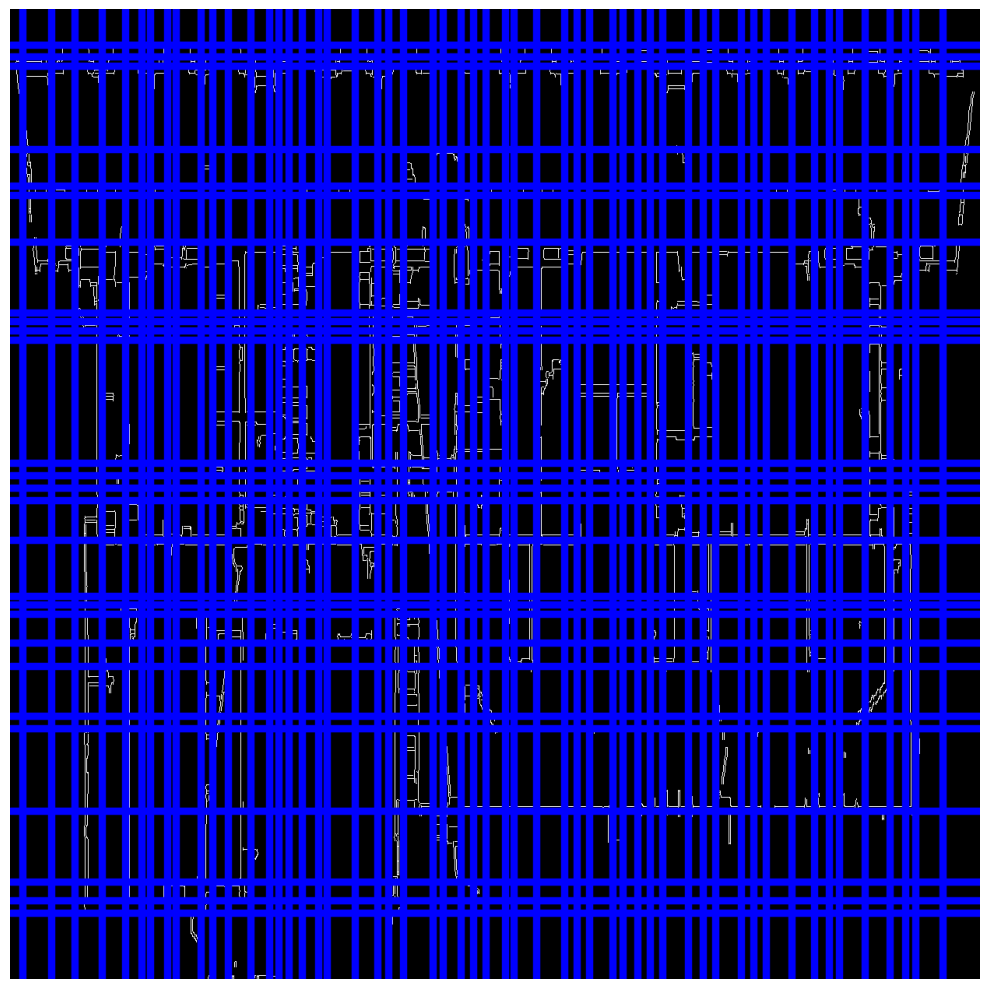

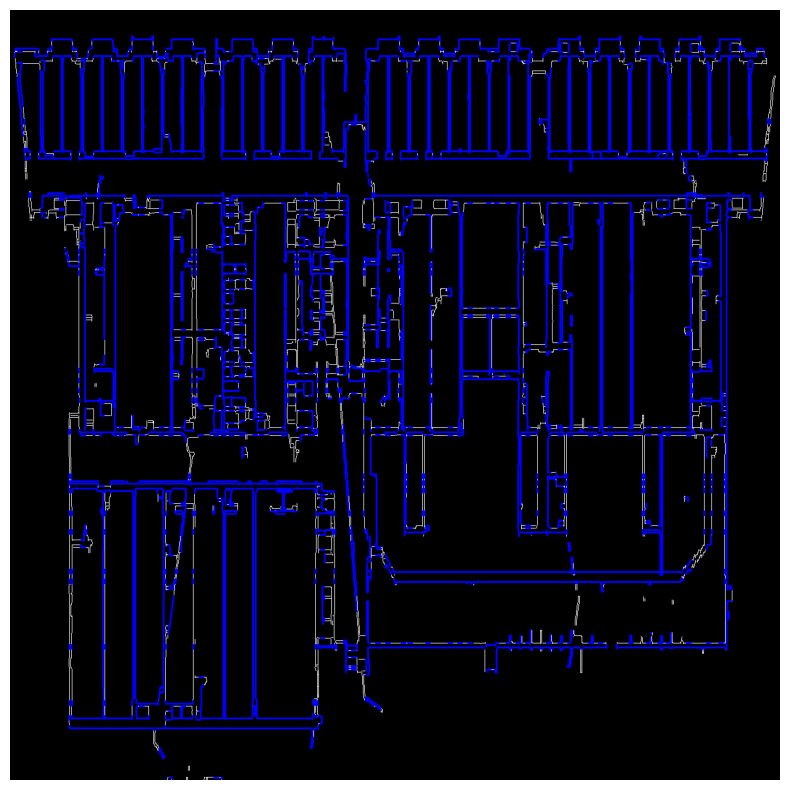

(315, 1246, 3)


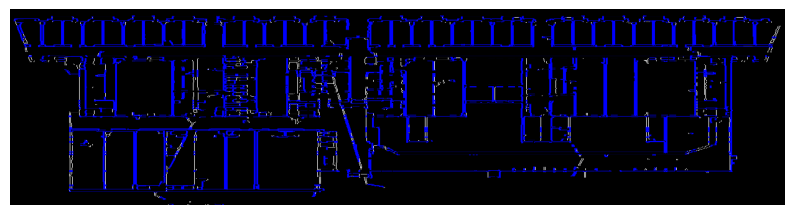

In [22]:
import cv2 as cv
import numpy as np
import math
import matplotlib.pyplot as plt
import random
from skimage.draw import line as skimage_line

# ------------
# ------------
filename = 'img/reassembled_E2_2.png'
src = cv.imread(filename)
if src is None:
    print('Error opening image!')
    print('Usage: hough_lines.py [image_name] \n')
    exit()

# Show the result
plt.figure(figsize=(10, 10))
plt.imshow(src)
plt.axis('off')
plt.show()

# Resize the image to make it square
max_dim = max(src.shape[:2])
src_square = cv.resize(src, (max_dim, max_dim), interpolation=cv.INTER_LINEAR)

# Apply morphological opening
kernel = np.ones((5,5),np.uint8)
src_square = cv.morphologyEx(src_square, cv.MORPH_OPEN, kernel, iterations=3)

# Edge detection
dst = cv.Canny(src_square, 50, 200, None, 3)

# Convert to BGR image for display
cdst = cv.cvtColor(dst, cv.COLOR_GRAY2BGR)

# Tile size
tile_size = max_dim // 4

# Detect lines in each tile
all_lines = []
for i in range(0, max_dim, tile_size):
    for j in range(0, max_dim, tile_size):
        tile = dst[i:i+tile_size, j:j+tile_size]
        lines = cv.HoughLines(tile, 1, np.pi / 180, tile_size//10, None, 0, 0)
        if lines is not None:
            for line in lines:
                rho, theta = line[0]
                a = math.cos(theta)
                b = math.sin(theta)
                x0 = a * rho + j
                y0 = b * rho + i
                max_len = int(np.sqrt(2) * max_dim)
                pt1 = (int(x0 + max_len*(-b)), int(y0 + max_len*(a)))
                pt2 = (int(x0 - max_len*(-b)), int(y0 - max_len*(a)))
                all_lines.append((pt1, pt2, theta))

# Non-maximum suppression
strong_lines = np.zeros([len(all_lines),1,2])
n2 = 0
for n1 in range(0, len(all_lines)):
    pt1, pt2, theta = all_lines[n1]
    rho = abs((pt2[1] - pt1[1]) * pt1[0] - (pt2[0] - pt1[0]) * pt1[1]) / np.sqrt((pt2[1] - pt1[1])**2 + (pt2[0] - pt1[0])**2)
    if n1 == 0:
        strong_lines[n2] = [[rho, theta]]
        n2 = n2 + 1
    else:
        if rho < 0:
            rho *= -1
            theta -= np.pi
        closeness_rho = np.isclose(rho, strong_lines[0:n2,0,0], atol=10)
        closeness_theta = np.isclose(theta, strong_lines[0:n2,0,1], atol=np.pi/45)
        closeness = np.all([closeness_rho, closeness_theta], axis=0)
        if not any(closeness):
            strong_lines[n2] = [[rho, theta]]
            n2 = n2 + 1

cdst_copy = cdst.copy()

# Show the result
plt.figure(figsize=(10, 10))
plt.imshow(cdst_copy)
plt.axis('off')
plt.show()

# Draw lines on the image
for line in strong_lines[:n2]:
    rho, theta = line[0]
    a = math.cos(theta)
    b = math.sin(theta)
    x0 = a * rho
    y0 = b * rho
    max_len = int(np.sqrt(2) * max_dim)
    pt1 = (int(x0 + max_len*(-b)), int(y0 + max_len*(a)))
    pt2 = (int(x0 - max_len*(-b)), int(y0 - max_len*(a)))
    angle_deg = theta * 180 / np.pi
    tolerance = 0.1
    if (abs(angle_deg) <= tolerance) or (abs(abs(angle_deg) - 90) <= tolerance) or (abs(abs(angle_deg) - 180) <= tolerance) or (abs(abs(angle_deg) - 270) <= tolerance):
        color = (0,0,255)
        cv.line(cdst, pt1, pt2, color, 7, cv.LINE_AA)

# Display the result
plt.figure(figsize=(10, 10))
plt.imshow(cdst)
plt.axis('off')
plt.tight_layout()
plt.show()

# Accumulate all points from each line found by Hough transform
all_hough_points = []


# Create a blank white image
blank_image = np.full((max_dim, max_dim, 3), (255, 255, 255), dtype=np.uint8)

for y in range(cdst.shape[0]):
    for x in range(cdst.shape[1]):
        if np.array_equal(cdst[y, x], [0, 0, 255]):
            all_hough_points.append((x, y))

# for x,y in all_hough_points:
#     blank_image[y,x] = (0,0,255)

# # Show the result
# plt.figure(figsize=(10, 10))
# plt.imshow(blank_image)
# plt.axis('off')
# plt.show()

for x, y in all_hough_points:
    if y+1 in range(cdst_copy.shape[0]) and y-1 in range(cdst_copy.shape[0]) and x+1 in range(cdst_copy.shape[0]) and x-1 in range(cdst_copy.shape[0]) :
        if np.array_equal(cdst_copy[y, x], [255, 255, 255]):
            cdst_copy[y,x] = (0,0,255)
            cdst_copy[y+1,x+1] = (0,0,255)
            cdst_copy[y+1,x-1] = (0,0,255)
            cdst_copy[y-1,x-1] = (0,0,255)
            cdst_copy[y-1,x+1] = (0,0,255)

# Show the result
plt.figure(figsize=(10, 10))
plt.imshow(cdst_copy)
plt.axis('off')
plt.show()

print(src.shape)
final_image = cv.resize(cdst_copy, (src.shape[1], src.shape[0]), interpolation=cv.INTER_LINEAR)

# Show the result
plt.figure(figsize=(10, 10))
plt.imshow(final_image)
plt.axis('off')
plt.show()

Tiling without diagonals with non maximum suppression and skeletonization

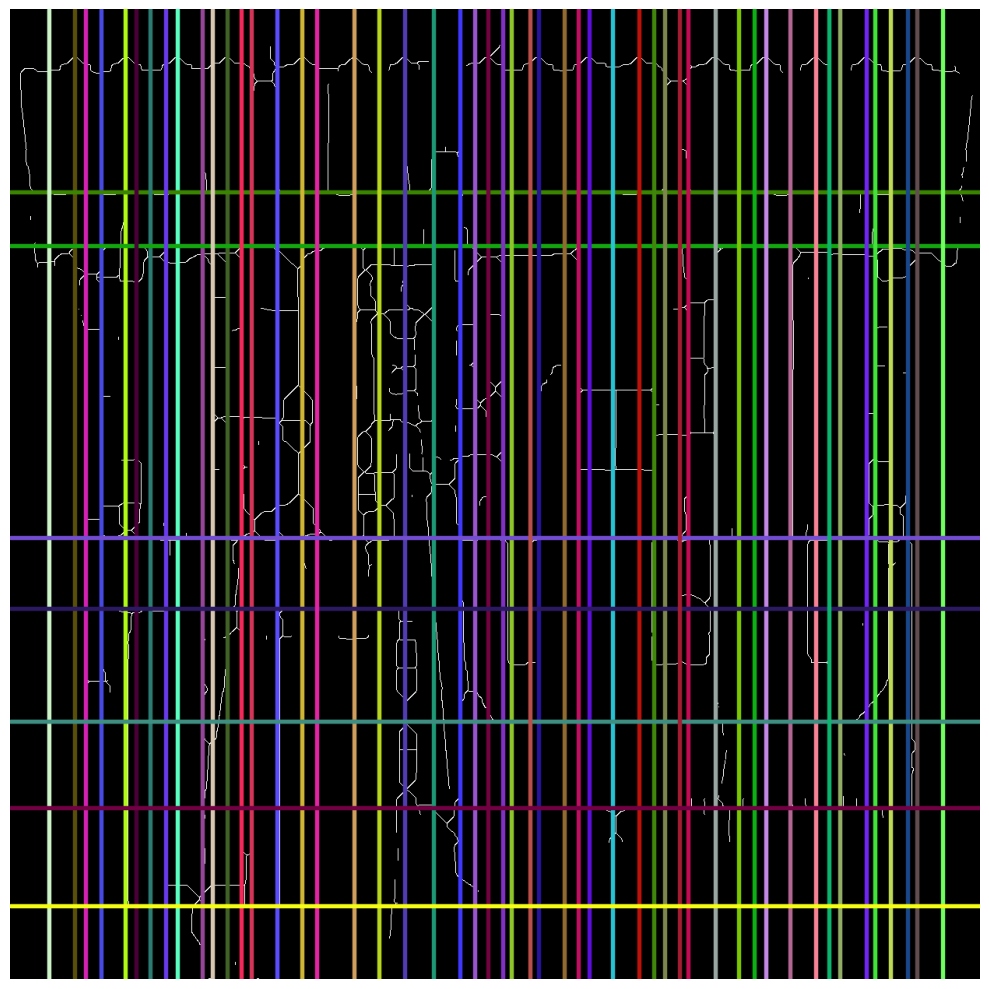

In [8]:
import cv2 as cv
import numpy as np
import math
import matplotlib.pyplot as plt
import random

# ------------
# ------------
filename = 'img/reassembled_E2_2.png'
src = cv.imread(filename)
if src is None:
    print('Error opening image!')
    print('Usage: hough_lines.py [image_name] \n')
    exit()

# Resize the image to make it square
height, width = src.shape[:2]
max_dim = max(height, width)
src_square = cv.resize(src, (max_dim, max_dim), interpolation=cv.INTER_LINEAR)

# Apply morphological opening
kernel = np.ones((5,5),np.uint8)
src_square = cv.morphologyEx(src_square, cv.MORPH_OPEN, kernel, iterations=3)

# Convert to grayscale
gray = cv.cvtColor(src_square, cv.COLOR_BGR2GRAY)

# Apply Gaussian blur
blur = cv.GaussianBlur(gray, (3,3), 0)

# Perform thresholding
_, thresh = cv.threshold(blur, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)
inverted_thresh = cv.bitwise_not(thresh)

# Skeletonization
skeleton = cv.ximgproc.thinning(inverted_thresh, thinningType=cv.ximgproc.THINNING_ZHANGSUEN)
skeleton = cv.cvtColor(skeleton, cv.COLOR_GRAY2BGR)

# Edge detection
dst = cv.Canny(skeleton, 50, 200, None, 3)

# Convert to BGR image for display
cdst = cv.cvtColor(dst, cv.COLOR_GRAY2BGR)

# Tile size
tile_size = max_dim // 4

# Detect lines in each tile
all_lines = []
for i in range(0, max_dim, tile_size):
    for j in range(0, max_dim, tile_size):
        tile = dst[i:i+tile_size, j:j+tile_size]
        lines = cv.HoughLines(tile, 1, np.pi / 180, tile_size//3, None, 0, 0)
        if lines is not None:
            for line in lines:
                rho, theta = line[0]
                a = math.cos(theta)
                b = math.sin(theta)
                x0 = a * rho + j # Adjust x-coordinate based on tile position
                y0 = b * rho + i # Adjust y-coordinate based on tile position
                max_len = int(np.sqrt(2) * max_dim)
                pt1 = (int(x0 + max_len*(-b)), int(y0 + max_len*(a)))
                pt2 = (int(x0 - max_len*(-b)), int(y0 - max_len*(a)))
                all_lines.append((pt1, pt2, theta))

# Non-maximum suppression
strong_lines = np.zeros([len(all_lines),1,2])
n2 = 0
for n1 in range(0, len(all_lines)):
    pt1, pt2, theta = all_lines[n1]
    rho = abs((pt2[1] - pt1[1]) * pt1[0] - (pt2[0] - pt1[0]) * pt1[1]) / np.sqrt((pt2[1] - pt1[1])**2 + (pt2[0] - pt1[0])**2)
    if n1 == 0:
        strong_lines[n2] = [[rho, theta]]
        n2 = n2 + 1
    else:
        if rho < 0:
            rho *= -1
            theta -= np.pi
        closeness_rho = np.isclose(rho, strong_lines[0:n2,0,0], atol=10)
        closeness_theta = np.isclose(theta, strong_lines[0:n2,0,1], atol=np.pi/45)
        closeness = np.all([closeness_rho, closeness_theta], axis=0)
        if not any(closeness):
            strong_lines[n2] = [[rho, theta]]
            n2 = n2 + 1

# Draw lines on the skeletonized image
for line in strong_lines[:n2]:
    rho, theta = line[0]
    a = math.cos(theta)
    b = math.sin(theta)
    x0 = a * rho
    y0 = b * rho
    max_len = int(np.sqrt(2) * max_dim)
    pt1 = (int(x0 + max_len*(-b)), int(y0 + max_len*(a)))
    pt2 = (int(x0 - max_len*(-b)), int(y0 - max_len*(a)))
    angle_deg = theta * 180 / np.pi
    tolerance = 0.1 # Adjust tolerance as needed
    if (abs(angle_deg) <= tolerance) or (abs(abs(angle_deg) - 90) <= tolerance) or (abs(abs(angle_deg) - 180) <= tolerance) or (abs(abs(angle_deg) - 270) <= tolerance):
        color = (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))
        cv.line(skeleton, pt1, pt2, color, 3, cv.LINE_AA)

# Display the result
plt.figure(figsize=(10, 10))
plt.imshow(cv.cvtColor(skeleton, cv.COLOR_BGR2RGB))  # Convert BGR to RGB for matplotlib display
plt.axis('off')
plt.tight_layout()
plt.show()